# Replication Low-Skilled Immigration and the Labor Supply of Highly Skilled Women -  Patricia Cortés and José Tessada 2011.

Project for the course in Microeconometrics | Summer 2020, M.Sc. Economics, Bonn University | [Anh-Thu Duong](https://github.com/Thu-Duong)

This notebook contains my replication of the results from the following paper:

> Cortés, Patricia, and José Tessada. 2011. ["Low-Skilled Immigration and the Labor Supply of Highly Skilled Women."](https://www.aeaweb.org/articles?id=10.1257/app.3.3.88) American Economic Journal: Applied Economics, 3 (3): 88-123

##### Information about replication :

* In this notebook, I replicate the main results presented in the paper by Cortes(2011). I follow the original structure of the paper. All tables and figures are named and labeled as they appear in original paper.

* Furthermore, I include more information on the history of immigrants to the United States and my discussion on female labor participation.

* For transparency, all sections in the replication that constitute independent contributions by me and are not part of results presented (or include deviations from the methods used) in the paper are marked as _extensions_.

##### Dataset used for this notebook :

* The original dataset provided by the authors works well on Stata, however there are some small differences in this notebook to suit the workflow of python. Running this notebook on the original dataset will not work smoothly. Readers can find more detail in the data appendix at the end of this notebook. 

# Table of contents
1. [Introduction](#1)<br>
    1.1 [Extensions: A snap shot on the United States immigration](#11)<br>
    1.2 [Paper abstract](#12)<br>
2. [Theoretical Framework](#2)<br>
3. [Empirical Analysis](#3)<br>
    3.1 [Identification Strategy](#31)<br>
    3.2 [Instrument](#32)<br>
4. [Replication Cortés, Patricia, and José Tessada. 2011](#4)<br>
    4.1 [Data](#41)<br>
     [A.Main Data and Descriptive Statistics](#41a)<br>
     [B.Extensions: Selected group of women](#41b)<br>
    4.2 [Econometric Specifications and results](#42)<br>
     [A.Labor Supply of Highly Skilled Women](#a)<br>
     [B.Mothers of young Children](#b)<br>
     [C.Men as a Control group](#c)<br>
     [D.Time devoted to Household Work](#d)<br>
     [E.Consumption of Housekeeping Services](#e)<br>
     [Additional tables](#ad)<br>
5. [Extensions:](#5)<br>
    5.1 [Top quartile married women to household work](#51)<br>
    5.2 [Discussion](#52)<br>
6. [Conclusion](#6)<br>
7. [Appendix](#7)<br>
8. [Reference](#8)<br>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
import econtools.metrics as emt
import os

from statsmodels.formula.api import wls
from auxiliary.auxiliary_datasets import *
from auxiliary.auxiliary_subdatasets import *
from auxiliary.auxiliary_tables import *
from auxiliary.auxiliary_functions import *
from auxiliary.auxiliary_plots import *
from auxiliary.auxiliary_regs import *
from IPython.display import IFrame
pd.options.mode.chained_assignment = None

***

## 1.Introduction <a id="1"></a>

### 1.1 Extension: A snap shot on the United States immigration  <a id="11"></a>
US history had two periods of mass immigration. The first wave is an unrestricted migrant arrivals from Western Europe (1850-1913) and the second period (1965-present) is characterized by more constrained migration from Asia and Latin America. Immigration has become an important political discourse in American policy. Both in the past and present, US natives have expressed concern that immigration lowers their wages and causes problems for US society. However, immigrants are more likely to be high school dropouts than the native-born. Many immigrants live in households that are linguistically isolated. Immigrant parents usually have to depend on their children to interpret and translate English. For all of these barriers, low-skilled foreign-born are not a perfect substitute for uneducated natives. As found in Ottaviano/Peri (2006) native workers lost just 1.1% of their real wages as a result of immigration between 1990 and 2004 in the long term. Also in the short term (as of 2004) the negative effects was a modest 2.2% actual loss of income.

Two figures below show the recent trend and the highest level of education of immigrants to American.

##### Extension Figure 1: Origin of immigrant population in the United States

In [2]:
IFrame(src="https://www.pewresearch.org/hispanic/chart/immigrant-statistical-portrait-origins-of-the-u-s-immigrant-population/iframe/", width="90%",height="400px",frameborder="0")

##### Extension Figure 2: Education attainment of immigrant population in the United States

In [3]:
IFrame(src="https://www.pewresearch.org/hispanic/chart/immigrant-statistical-portrait-educational-attainment-among-u-s-immigrants/iframe/",width="90%",height="350px",frameborder="0")

Moreover, Sandra Sequeira et al.(2020) find that immigration results in long-term economic benefits. In counties with more historical immigration, people have higher incomes, less unemployment, less poverty, more education, and higher shares of urban population and there is no evidence that historical immigration affects social cohesion as measured by social capital, voter turnout, or crime rates. Historical immigration was also associated with higher rates of both trade and innovation, which may have contributed to economic growth. Another reason why slow-skilled foreign born people might help to keep or push up demand for labor is that it slows down the process of mechanization. Lewis (2011) also argues that cities with larger inflows of unskilled immigrants were slower to adopt labor-saving technologies, thereby preserving the demand for low-skilled native workers. 

However, the nature of migration selection appears to have changed over time. At the center of the debate, Cortes et al.(2011) research is to examine the effects of the recent waves of low-skilled immigration on native female labor supply. Immigrants who become substitutes for natives in the production of household services may impact the availability of native labor by reducing the market price of those services.

### 1.2 Paper abstract  <a id="12"></a>
From the 1970s to 2000s, the United States experienced a wave of Hispanic and Asian low-skilled immigrants. Low-skilled immigrants provide cheaper and more flexible household services that are close substitutes for household production. Thus, Cortes et al.(2011) argues that with cheaper services available in the market natives are induced to substitute their own time invested in the production of household goods. More importantly, the authors argue that even without a direct effect on wages, low-skilled immigration has the potential to generate effects on natives’ decisions related to time-use. 

The authors develop a simple model to investigate which groups of the female population are more likely to change their time-use decisions as prices for household related services decrease; then test the model’s predictions using census data on immigration and labor supply, and information on time devoted to household work and reported expenditures on housekeeping services. The empirical strategy is to exploit the cross-city variation in the distribution of low-skilled immigrants. To address the potential endogeneity of the location choices of immigrants, the historical (1970) distribution of immigrants of a country is used as the instrument for low skilled immigrant concentration to predict the location choices of later immigrant flows.

* Key variables

|Instrument | Treatment | Main outcomes | 
|:------|:------|:------|
|Historical (1970) distribution of immigrants| Low-skilled immigrant 1980s - 2000 | Usual hours work |
|     |      | Labor force participation   |
|     |      | Hours per week spent doing household chores   |
|   |   | Probability of working more than 50 and 60 hours per week|

The remainder of this notebook is structured as follows. The next section presents the theoretical framework. Section 3 describes the data and the descriptive statistics. Section 4 is the replication of the results in the paper and discusses the main results, and in Section 5, I make an extension on the subgroup of top quartile wage earning women and discuss some concerns of the paper. Section 6 offers some concluding remarks.

## 2. Theoretical Framework <a id="2"></a>
Cortes et al.(2011) present a simple time-use model that illustrates the interactions between wage levels, the decision to purchase household services, the market price of household services, and labor supply. The purpose is to find any change in time-use of agents that are both working in the market and purchasing household services as the decreasing in household services price.



                                                     A. Set up

An agent allocates her time between leisure, household production, and market work.
Let denote:
* y the amount of the consumption good
* l the hours of leisure
* h the hours of household work 
* n the hours of market work, 
* x the units of the household service purchased on the market
* I the nonwage income of the household
* w the wage per unit of time devoted to market work

Utility is given by 

(1)   $$\\u(y) + \psi(l)$$
The agent faces two constraints: a budget constraint and a time constraint (which can be reduced into a full income constraint).

Note that $u$(.) and $\psi$(.) are concave and satisfy $u^\prime(y)\rightarrow\infty$ as $y\rightarrow 0$ and $\psi $ as $l\rightarrow 0$. Household production $f(h)$ is assumed to have decreasing marginal returns to time spent working at home and $f^\prime(h)\rightarrow\infty$ as h$\rightarrow 0$. This condition implies that a person will never outsource of her household work. Based on Cortes (2008), inflow of low-skilled immigrants decreases p with the assumption of no effect on wage levels, at least for the group that purchases household services in the market.

Four important results from the solution of the model:

* First, people with higher wages (for a given level of I and p) supply labor in the market.
* Second, for a given w and I, a decrease in p might induce a person to purchase market-provided household services, or to purchase even more.
* Third, for a given p and I, people with higher wages are more likely to buy household services.
* Finally, only those who purchase services will change their decisions at the margin when p changes



                               B. The Effects of an Inflow of Low-Skilled Immigrants

*Effect on Household Work*

In the simple model of time-use, the high productivity type's optimal choice is to outsource part of the household production. Changes in hours spent in household production for households with lower wages should not be seen. With the wage low enough natives are expected to compete with immigrants in the labor market.
A noticeable point of the effect of a fall in p is within high-earned groups who already buy the household services, subgroups with lower salaries will decrease their household work by more than those with higher salaries if p falls. Therefore, the effect of a fall in p on household work is stronger for the high-salaried group provided that the much lower share of women purchasing household services in other groups dominates the intensive margin effect.

*Effect on Labor Supply*

In considering the fact that changes in p keep the relative price of leisure versus consumption unchanged, the effect on leisure is only due to a change in disposable income. If leisure is an inferior good or if it does not respond to changes in income, the working hours on the market will clearly increase when p goes down. If leisure is a normal good (as in our case because the utility function is separable in y and l) then the direction of the effect will depend on the relative magnitudes of  $\partial h/ \partial p$ versus  $x*(\partial l / \partial Income$)

(2) $$\frac{\partial n^*}{\partial p} = -\frac{\partial h^*}{\partial p} + \frac{wxu''(.)}{w^2u''(.)+\psi ''(.)}$$ 

Note that if the income effect is fairly small, we have that
$$\frac{\partial \mathopen|\frac{\partial n^*}{\partial p}\mathclose|}{\partial w} <0 $$

From (2), agents with higher unearned income (and higher usage of market-provided household services, x) will respond less to changes in p. The model predicts that (only) high-wage women will be impacted by lower prices of household services as a result of low-skilled immigration influx.

*Household Composition: Children at Home*

With the presence of a child at home, especially young children who are not old enough to attend school, the responsibility of care provision still lies on the family (age less than six so that they cannot receive most of the services available from schools). The reduction in prices of housework to close substitutes of household production affects time-use decisions of agents. In particular, Cortes et al.(2011) model this case as a household requiring a higher number of units of household services R to function properly.

*Labor Force participation and the decision to purchase Household Services*

In the simple model, the labor supply of women is affected by the amount of housework needed and how much market services to buy. There are two different directions of how agents respond to a large R. Firstly, if an agent does not buy the market services, a great amount of housework costs more time of the agents, thus leisure and/or labor supply reduces. It also lowers the marginal productivity of time on household work. In another case, if agents both supply labor and purchase household services, larger R translates into higher demand for market services x, and agents provide higher labor supply to cover the increasing bill. In short, conditional on purchasing household services, mothers buy more units of service than nonmothers.

*Sensitivity to Changes in prices of Household Services*

From previous discussions, how much a change in p affects labor supply affects labor supply depends on devotion to household work and the magnitude and sign of income effect to leisure. The derivative $\partial h^*/\partial p$ is independent of R, so differences in the sensitivity of labor supply to prices between mothers and non-mothers depend only on differences in the income effect on leisure. If leisure is a normal good, and given that mothers spend a larger fraction of their total income purchasing market-provided household services, the income effect of a reduction in p will be larger. 
Consequently, mothers would increase their leisure (and thus decrease their labor supply) relatively more than nonmothers.

*Career Concerns*

In some corporate and financial sectors, short working hours and job interruptions impose a huge penalty for potential earnings growth, which explains to a large extent the substantial gender gap observed a few years after graduation (shown in recent empirical evidence by Marianne Bertrand, Claudia Goldin, and Lawrence F. Katz (2010)). If job considerations are important for a large fraction of highly skilled women, the results at the top of the distribution of hours worked may be more pronounced than the responses of average hours of work and involvement in the labor force.

## 3. Empirical Analysis<a id="3"></a>

### 3.1. Identification Strategy<a id="31"></a>
The objective of Cortes et al.(2011) is to exploit cross-city variation in the concentration of low-skilled immigrants to identify their effect on the time-use decisions of American women and purchases of household services. 

With the concern that immigrants are not randomly assigned across labor markets, Cortes et al. (2011) instrument for immigrant location using the historical (1970) distribution of immigrants of a given country to address the potential endogeneity of the location choices. The second concern is whether local labor markets are not closed. In this case, natives may respond to the immigrant supply shock by moving their labor or capital to other cities, re-equilibrating the national economy. Although David Card and John DiNardo (2000), Card (2001), and Card and Ethan G. Lewis (2005), using different samples and specifications, have all found that native mobility has virtually no offsetting effect on the relative supply shocks created by immigration. George J. Borjas (2006) estimates that 6.1 fewer native workers choose to reside in a city for every 10 new immigrants that arrive in the city and Glitz (2012) finds displacement effects of immigration with 3 unemployed natives for 10 immigrants finding a job.

The causal graph below illustrates the relationship between immigrants and labor supply of highly-skilled women

##### Extension Figure 3: The causal effect of immigration on labor supply of highly-skilled women

<img src="material/Casual-effect1.png" width="700" height="500"/>

The second causal graph illustrates how exogeneity assumption and exclusion restriction might be violated. Firstly, cities that attracted more immigrants in 1970 might be systematically different from other cities. Cortes et al.(2011) include specifications that allow cities to experience different decade shocks based on their 1970 value of key variables, such as female educational attainment distribution, female labor force participation, and industry composition.

Secondly, low-skilled immigration might have an impact on the labor supply of women through other channels besides lowering prices of household services, a natural candidate is the effect that low-skilled  immigration might have on the wages of natives. To tackle this issue, Cortes et al.(2011) present specifications that include both men and women, allowing us to use men of identical skill as controls and to incorporate in the regressions city × decade fixed effects. These fixed effects also help address even further potential violations of exogeneity assumption

##### Extension Figure 4: The causal effect of immigration on labor supply of highly-skilled women with potential violations of the assumptions

<img src="material/Casual-effect2.png" width="700" height="500"/>

### 3.2. Instrument<a id="32"></a>
The instrument explains the tendency of immigrants to settle in a city with a large enclave of immigrants from the same country. The instrument uses the 1970 distribution of immigrants from a given country across US cities to allocate the new waves of immigrants from that country. For example, if a third of Mexican immigrants in 1970 were living in Los Angeles, the instrument allocates one-third of all Mexicans in the 1990s to Los Angeles. Formally, the instrument for the number of low-skilled immigrants in city i and decade t can be written as

$$\\ \sum\frac{Immigrants_{ji1970}}{Immigrants_{j1970}}* LS Immigrants_{jt}$$

where j are all countries of origin included in the 1970 census; $Immigrants_{ji1970}$/$Immigrants_{j1970}$ represents the percentage of all immigrants from country j included in the 1970 census who were living in city i

The instrument will help in identifying the causal effect of immigration concentration on time use of native 
women as long as the following conditions hold:

* The unobserved factors determining that more immigrants decided to locate in city i versus city i′ (both cities in the same region) in 1970 are not correlated with changes in the relative economic opportunities for skilled women offered by the two cities during the 1980s and 1990s.

* The total (national) flow of low-skilled immigrants in a given decade (second term in the interaction) is exogenous to differential shocks to cities within a given region.

Estimation of the first stage and a few robustness tests are presented in [Table 6](#t6)

## 4. Replication Cortés, Patricia, and José Tessada. 2011<a id="4"></a>

### 4.1. Data and Descriptive Statistics <a id="41"></a>

#### A. Main Data and Descriptive Statistics <a id="41a"></a>
Cortes et al.(2011) examine immigration trend, market work, household work and expenditures for housekeeping of native women in 1980s, 1990s and 2000 using:
* The 5 percent sample of the 1980, 1990, and 2000 Census Integrated Public Use Microdata (IPUMS)
* The American Time Use Survey (ATUS), a monthly survey of the the Bureau of Labor Statistics (BLS)
* The Panel Study of Income Dynamics (PSID), longitudinal panel survey of American families
* The Consumer Expenditure Surveys (CEX) data,  on expenditures, income, and demographic characteristics of consumers in the United States

For evaluating the effects of low-skilled immigrants on native women labor supply, the authors define

Low-skilled immigrants as:
* Having not completed high school
* Being a naturalized citizen or not being a citizen
* Age between 16–64 being in the labor force and not enrolled in school

Highly-skilled native women as:
* Between age 20 and 64
* Having occupations with the highest wage levels or occupations that demand long hours work more than 50 and 60 hours a week 

##### *Immigration trend*
The authors begin by summarizing trends in low-skilled immigration over the last several decades. Table 1 shows the share of low-skilled immigration in the United States have evolved over the 30 largest cities in the United States.

##### Table 1—Share of Low-Skilled Immigrants in the Labor Force (percentage)

In [4]:
create_table1()

,1980,1990,2000
City,,,
Atlanta,0.38%,0.84%,3.23%
Baltimore,0.76%,0.44%,0.67%
Boston,3.53%,2.71%,2.62%
Buffalo,1.48%,0.72%,0.47%
Chicago,4.99%,5.09%,5.86%
Cincinnati,0.44%,0.23%,0.34%
Cleveland,1.82%,0.89%,0.65%
Columbus,0.43%,0.25%,0.81%
Dallas-Fort Worth,2.13%,5.17%,8.63%


As observed, there is significant variation in immigrant concentration both across cities and through time. Immigrants are heavily concentrated in large cities, such as Los Angeles, New York, and Miami. The authors will exploit this variation in our empirical strategy. In other smaller cities, low-skilled immigrants make up a negligible share of the workforce. In the 1990s , new waves of low-skilled immigrants decided to move to new cities. For example, Denver, Dallas, Washington DC, and especially Atlanta, have experienced a significant increase in the concentration of low-skilled immigrants.

##### Extension Figure 5: Distribution map of the foreign-born population in the United States 2000
Source: [Pew Research Center](https://www.pewresearch.org/hispanic/2019/06/03/facts-on-u-s-immigrants-county-maps/)

<img src="material/Foreign-Born-2015_county-maps-2000.png" width="500" height="350" />

##### *Market Work* 

As observed, female’s labor supply at the bottom of hourly wage percentile is substantially lower. They are younger, and are less likely to be married. On the other hand, women in the top quartile and top decile tend to work more hours a week, are much more likely to work more than 50 or 60 hours.

##### Table 2—Descriptive Statistics—Census Data on Native Women’s Labor Supply  by Wage Percentile

In [5]:
data2=data_table2()
table2=create_table2(data2)
table2

As the level of education of women has increased and their job opportunities have become more varied, the stigma of working women has decreased. Women with a graduate degree, a college degree, and some college present a significant increase in their labor force participation between 1980 and 1990. It is noticeable that close to a third of professional women (mostly doctors, lawyers and PhDs) reported working 50 hours or more a week in 2000, a doublefold increase from 1980 and at least two times as large as the share for women from any other group. Highly educated women are also at least three times as likely, compared to any other educational group, to work 60 hours or more a week. Another reason is that, as marriage rates have decreased since 1980, and women's jobs have increasingly become careers, rather than merely a means of earning income.

##### Table 3—Descriptive Statistics—Census Data on Native Women’s Labor Supply  by Education Level

In [6]:
data3=data_table3()
table3=create_table3(data3)
table3

##### Household Work

For all women, hours spent on household work decreased significantly between 1980–2000. In both years, time spent on household chores is significantly smaller for women above the median wage. The time men spent doing household work is between one-half and one-third the amount women with similar wages spent.

##### Table 4—Descriptive Statistics—Time Use of Women from 1980 PSID and 2003–2005 ATUS

In [7]:
data4=data_table4()
table4=create_table4(data4)
table4

##### Consumption data

As observed in table 5, the probability of consuming household services increases significantly with the wage percentile of the wife/female head of the household. Whereas in 2000, for only 3 percent of households where such a female had a wage below the median, that fraction rises to 8 percent, 18 percent, and 26 percent when considering females at the third quartile, top quartile, and top decile, respectively. Note that this pattern is consistent with the predictions of the model, where only women with high wages or high unearned income will purchase household services. Expenditures on household services tend to increase with the wage percentile of the main adult female in the household. Households with a wife or female household head at the top quartile of the wage distribution (conditional on reporting positive expenditures) spent close to 30 percent more in housekeeping services than other households.

##### Table 5—Descriptive Statistics—Consumer Expenditure Survey

In [8]:
data5=data_table5()
table5=create_table5(data5)
table5

0 - 25th percentile                    \
                                                       1980     1990     2000   
Dummy for positive exp. in housekeeping               0.034    0.042    0.022   
Housekeeping exp. |E>0 (1990 dollars)                 172.5    165.9      176   
(std)                                               (192.2)  (183.6)  (193.2)   

                                        25 - 50th percentile           \
                                                        1980     1990   
Dummy for positive exp. in housekeeping                0.041    0.055   
Housekeeping exp. |E>0 (1990 dollars)                  124.3    174.6   
(std)                                                (119.3)  (124.4)   

                                                 50 - 75th percentile  \
                                            2000                 1980   
Dummy for positive exp. in housekeeping    0.039                0.045   
Housekeeping exp. |E>0 (1990 dollars)      141.3                  137   
(std)                                    (177.7)              (170.3)   

                                                           \
                                            1990     2000   
Dummy for positive exp. in housekeeping    0.042    0.079   
Housekeeping exp. |E>0 (1990 dollars)      172.1    175.6   
(std)                                    (143.0)  (201.3)   

                                        75 - 100th percentile           \
                                                         1980     1990   
Dummy for positive exp. in housekeeping                 0.142    0.184   
Housekeeping exp. |E>0 (1990 dollars)                   279.5    212.2   
(std)                                                 (412.7)  (160.6)   

                                                 90 - 100th percentile  \
                                            2000                  1980   
Dummy for positive exp. in housekeeping     0.18                 0.171   
Housekeeping exp. |E>0 (1990 dollars)      207.4                 297.7   
(std)                                    (210.4)               (454.8)   

                                                           
                                            1990     2000  
Dummy for positive exp. in housekeeping    0.282    0.263  
Housekeeping exp. |E>0 (1990 dollars)      222.8    232.2  
(std)                                    (154.6)  (255.8)

***

#### B. Extensions:Selected group of women <a id="41b"></a>

Notice the declining incidence of marriage between 1980 and 2000 in the authors' dataset, in this section, I focus on exploring the difference in the working hours of married or having young children with unmarried or not having small children. As seen in figure 2, labor supply of women increases dramatically over the last decades. Significantly, married women's hours of market work are the forces driving change of female labor supply in the US. 

I put a hypothesis (presented in section 5.1) on marriage status of women could lead to different reaction when housekeeping service price decrease as the impact of large influx of migrants.

##### Figure 6: Labor Force Participation of Women in the USA, 1955-2005 <a id="f6"></a>
Source: [ourworldindata.org](https://ourworldindata.org/female-labor-force-participation-key-facts)

<img src="material/Labor-Force-Participation-of-women-in-the-US-1955-2005.png" width="500" height="400" />

Considering in the dataset of original paper, the figure 3 below show that working hours of married women is lower than unmarried women in all education levels as well as in all hourly wage percentile groups. In particular, the average annual hours of married women is less than unmarried women. There is very similar labor supply patterns for these groups over the 1980-2000 period to those for having young child women overall.

The measure of labor supply in Figure 3 is annual work hours: the product of usual hours worked per week and weeks worked per year. I exclude individuals with zero work hours as well as zero annual weeks worked.

##### Figure 7: Annual working hours for selected groups of women

In [9]:
df6=data_plot6(data3)
df7=data_plot7(data2)

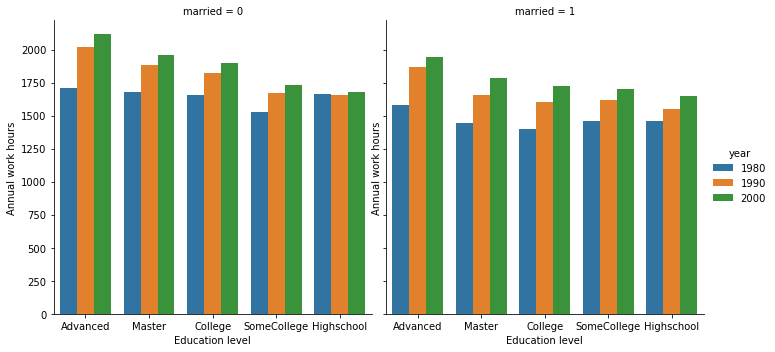

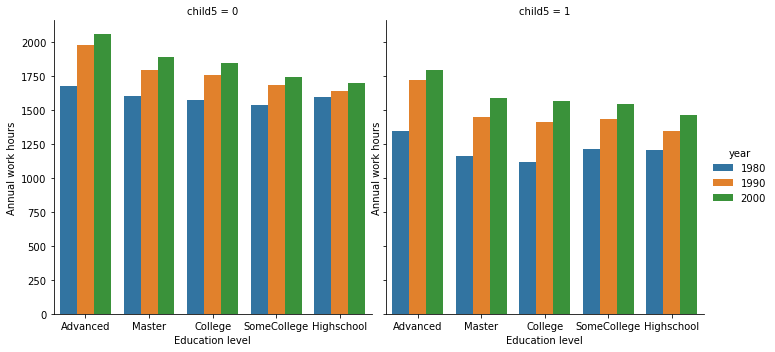

In [10]:
# Education level - married/child5
order6 = ['Advanced','Master','College','SomeCollege' ,'Highschool']
plot_hrswork(df6,"edulv",order6)

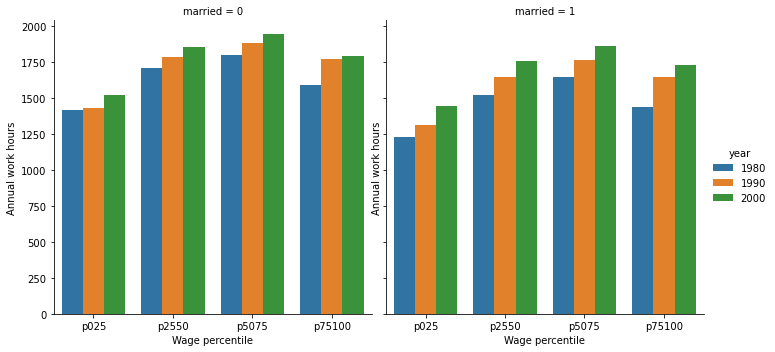

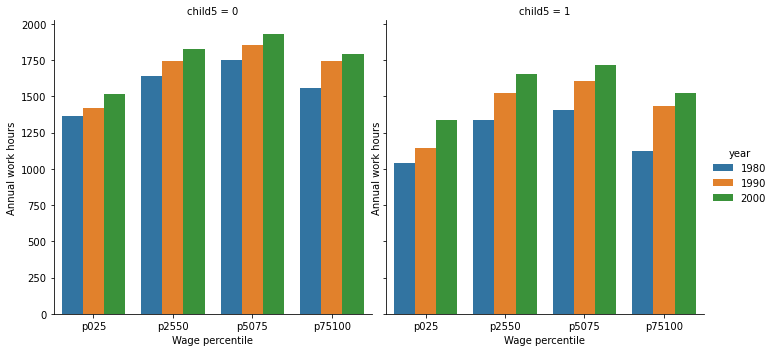

In [11]:
# Wage percentile - married/child5
order7 = ['p025','p2550','p5075','p75100']
plot_hrswork(df7,"percentile",order7)

### 4.2. Econometric Specifications and results <a id="42"></a>

<div class="alert alert-block alert-warning">
NOTICE: For some tables below I only load the results in the notebook as the entire table is quite computationally expensive. Memory errors may happen with large data over 1GB. Detailed codes to re-produce complete table are presented in the appendix at the end of this notebook.
    
<b>My note of the different results compared to the original paper will be highlighted in  YELLOW  and authors' notes for their specification will be in BLUE</b>
</div>

The first stage is presented in Table 6. The result suggests that an increase of 10 percent in the predicted number of low-skilled immigrants increases the share of low-skilled workers by around 2 percent. To address the variation in the  concentration of low-skilled immigrants, Cortes et al.(2011) add controls and exclude California and the top migrant cities in the regression. However, the result does not change the magnitude or statistical significance of the coefficient.

As mentioned in the identification strategy, even if the first concern about exogenous assumption of the instrument holds, the second concern about exclusion restriction is worrying. Low-skilled immigration might affect time-use decisions of American women through other channels such as changing wages of native workers. To solve this problem, the authors present specifications that include both men and women, allowing us to use men of identical skill as controls and to incorporate in the regressions city × decade fixed effects.

##### Table 6—Sample First Stage<a id="t6"></a>

In [12]:
#First stage
wls1,wls2,wls3,wls4=get_reg_first_stage()
table6=create_table6(wls1,wls2,wls3,wls4)
table6

ln[(LS Imm + LS Nat)/Labor Force]  \
                                                                              (1)   
Log(∑share i,j,1970 × LS Imm jt)                                            0.207   
                                                                          (0.060)   
Controls                                                                    Basic   
Excludes California                                                            No   
Excludes Miami, New York City, and Los Angeles                                 No   
Number of cities                                                              116   

                                                                            
                                                     (2)      (3)      (4)  
Log(∑share i,j,1970 × LS Imm jt)                   0.189    0.188    0.200  
                                                 (0.056)  (0.068)  (0.067)  
Controls                                           Basic    Basic    Basic  
Excludes California                                  Yes       No       No  
Excludes Miami, New York City, and Los Angeles        No      Yes       No  
Number of cities                                     104      113      116

<div class="alert alert-block alert-info">
<b>Authors' Notes</b> ln[(LS Imm + LS Nat)/Labor Force] = ln[(Low-skilled Immigrants + Low-skilled Natives)/Labor Force]. OLS estimates. Regressions are weighted by the city’s labor force size. City and region × decade fixed effects are included in all the regressions. Robust standard errors are reported in parentheses. Number of observations is number of cities multiplied by three. Additional controls are the following variables constructed for 1970 interacted with time dummies: share of workers in the agricultural sector, in the manufacturing sector, and in high skilled services sector, log of hourly wage of college graduate, share of women with a college degree, and LFP of college educated women.
</div>

#### A. Labor Supply of Highly Skilled Women <a id="a"></a>
In the simple model, the framework suggests that price indexes (in particular, the price index of household services in a city) should be the explanatory variable in our analysis of time use and consumption. However, in this paper the authors present basic reduced-form specifications using as the explanatory variable the log of the share of low-skilled workers in the labor force (henceforth denoted by $\mathcal{L}_{it}$), which is a simplified version of the price equations’ main explanatory variable in Cortes(2008)

The authors use the following specification, where the dependent variables of interest are usual hours a week worked, the probability of working at least 50 hours a week, and the probability of working at least 60 hours a week:

$$\\ (3)\
LS_{nit} =  \delta^w *\mathcal{L}_{it} + \mathbf{X^\prime}_{nit}\mathbf{\Lambda}_{t}^w + \tau^w*\mathbf{Additional Controls}_{it} + \phi_{i}^w + \psi_{jt}^w + \epsilon_{it}^w $$

where

$$\\ \mathcal{L}_{it} =  ln(\frac{LS Immigrant + LS Natives}{LaborForce})$$

$w$ : the wage percentile of the individual\
$i$ : city\
$t$ : decade\
$j$ : region\
$X_{nit}$ : individual-level characteristics, namely age, age squared, race, marital status, and the presence of children in several age brackets\
$ \phi_{i}$ : city fixed effects\
$\psi_{jt}$ : region × decade fixed effects

To account for the fact that the main predictive variable ℒ it varies only at the city × decade level and, moreover, that labor supply is not independent among workers in a given city, the standard errors are clustered at the city × decade level. In the robustness checks the author show the standard errors using city clusters to address the possibility of serial correlation within cities across decades (see Appendix [Table A1](#a1))

The authors use a cell-based approach which divides the working women population into quartiles (and also the top decile). In general, the model shows that only women in the highest wage group should change their labor supply as the prices of household services decrease due to the influx of low-skilled immigrants. 
As observed in table 7, women in the top quartile and top decile increase the time women in this group work by 5 to 6 minutes per week. Specifications adding controls - such as labor force participation of women, education composition of women, industry composition of employment, and wage levels- interacted with decade dummies still show a very similar result.

##### Table 7 Low-Skilled Immigration and the Labor Supply of Women by Hourly Wage Quartile (Census data 1980–2000)

In [3]:
if 'TRAVIS'in os.environ:
    pass
else:
    #Create data for table 7
    data7,var_basic7,var_add7 = data_table7(data2)
    pdict = {"p90100":"90 - 100","p75100":"75 - 100","p5075":" 50 - 75","p2550":" 25 - 50","p025":"0 - 25"}
    panels7=["p90100","p75100","p5075","p2550","p025"]

In [6]:
if 'TRAVIS'in os.environ:
    table7 = pd.read_pickle('files/table7.pkl')
else:
    for panel in panels7:
        df=data7[(data7[panel]==1)&(data7['perwt']>0)]
        #First Stage
        fs_t7=reg_fstable7(df,var_basic7,var_add7)
        # OLS and IV 
        t71=reg_ivtable7(df,"chrswork",var_basic7,var_add7)
        t72=reg_ivtable7(df,"work50",var_basic7,var_add7)
        t73=reg_ivtable7(df,"work60",var_basic7,var_add7)
        #Concate table
        t7=pd.concat([fs_t7,t71,t72,t73],axis=1)
        t7.index=[pdict[panel],"","Controls"]
        # Save pickle
        filename="files/table7_"+panel+".pkl"
        t7.to_pickle(filename)
    #
    t7_p90100=pd.read_pickle('files/table7_p90100.pkl')
    t7_p75100=pd.read_pickle('files/table7_p75100.pkl')
    t7_p5075=pd.read_pickle('files/table7_p5075.pkl')
    t7_p2550=pd.read_pickle('files/table7_p2550.pkl')
    t7_p025=pd.read_pickle('files/table7_p025.pkl')
    table7=pd.concat([t7_p90100.iloc[0:2,:],t7_p75100.iloc[0:2,:],t7_p5075.iloc[0:2,:],t7_p2550.iloc[0:2,:],t7_p025],axis=0)

In [9]:
table7

First stage             Usual hours | H > 0                        \
                 OLS         OLS                  OLS       IV          IV   
90 - 100       0.225       0.190                0.089    2.622       3.534   
             (0.051)     (0.051)              (0.358)  (1.337)     (1.508)   
75 - 100       0.223       0.193                0.095    2.375       2.068   
             (0.051)     (0.051)              (0.216)  (0.735)     (0.754)   
 50 - 75       0.207       0.192               -0.160    1.150       0.657   
             (0.048)     (0.050)              (0.089)  (0.421)     (0.360)   
 25 - 50       0.195       0.196               -0.221    0.363       0.092   
             (0.045)     (0.046)              (0.120)  (0.517)     (0.492)   
0 - 25         0.187       0.187               -0.295   -0.181      -0.470   
             (0.045)     (0.047)              (0.103)  (0.432)     (0.453)   
Controls       Basic  Additional                Basic    Basic  Additional   

         P(Hours >= 50)                      P(Hours >= 60)           \
                    OLS       IV          IV            OLS       IV   
90 - 100         -0.004    0.124       0.085          0.001    0.045   
                (0.011)  (0.035)     (0.032)        (0.004)  (0.014)   
75 - 100         -0.003    0.093       0.061         -0.001    0.036   
                (0.008)  (0.026)     (0.023)        (0.003)  (0.011)   
 50 - 75         -0.004    0.057       0.034         -0.002    0.021   
                (0.004)  (0.018)     (0.015)        (0.002)  (0.007)   
 25 - 50         -0.001    0.059       0.038         -0.000    0.041   
                (0.004)  (0.017)     (0.012)        (0.002)  (0.010)   
0 - 25           -0.006    0.041       0.021         -0.004    0.033   
                (0.003)  (0.015)     (0.011)        (0.002)  (0.012)   
Controls          Basic    Basic  Additional          Basic    Basic   

                      
                  IV  
90 - 100       0.024  
             (0.012)  
75 - 100       0.020  
             (0.008)  
 50 - 75       0.010  
             (0.005)  
 25 - 50       0.028  
             (0.007)  
0 - 25         0.015  
             (0.008)  
Controls  Additional

<div class="alert alert-block alert-info">
<b>Authors' Notes</b> Table reports the coefficient of ln[(LS Imm + LS Nat)/Labor Force] = ln[(Low-skilled Immigrants + Low-skilled Natives)/Labor Force]. Each number comes from a different regression. All estimations include city, decade × region fixed effects, and demographic controls: age, age squared, black dummy, married dummy, dummy for having a child 5 or younger, dummy for having a child 17 or younger. Additional controls are the following variables constructed for 1970 interacted with time dummies: share of workers in the agricultural sector, in the manufacturing sector, and in high skilled services sector, log of hourly wage of college graduate, share of women with a college degree, and labor force participation of college educated women. Errors are clustered at the city × decade level. Female hourly wage distribution is constructed by region.
</div>

Next, to explore the effects of immigration on the extensive margin, the authors present alternative classifications that allow to incorporate in the regressions, women that are not currently participating in the labor market (and thus do not report a wage), but that have recently been active in the labor market (and thus do report an occupation). 

Using specifications that group women by the median male wage of their occupation (panel A), the average hours worked by men (Panel B) and the share of male colleagues working more than 50 and 60 hours (Panel C), the authors find significant effects on the intensive margin for women working in occupations with the highest wages. However, the labor force participation shows non-significant results. An explanation is that a significant part of the effect of immigration on labor supply would be observed not on the extensive margin, but on the intensive margin, particularly with some women moving into the upper part of the distribution of hours worked, an effect that is reinforced by career concerns in some of the most important occupations for this group of women. 

On intensive margin, the results in panel B and C suggest that a 10 percent increase in current immigration levels increases the probability that a woman in one of these occupations works 50 and 60 hours by 0.4 and 0.2 percentage points, respectively.

##### Table 8—Low-Skilled Immigration and the Labor Supply of Women in Occupations with Highest Wages and Longest Hours, and of Women with High Educational Attainment  (Census data 1980–2000; IV estimations)

In [8]:
table8PnA=pd.read_pickle('files/table8_pnA.pkl')
table8PnA

,Usual hours|week,LFP,Usual hours|H>0,P (Hours>=50),P (Hours>=60)
Panel A. Male median wage per hour,,,,,
Top 10,0.535,-0.030,1.032,0.087,0.034
,(0.902),(0.020),(0.780),(0.039),(0.020)
Top 25,0.451,-0.036,0.980,0.069,0.023
,(0.563),(0.014),(0.497),(0.026),(0.011)


In [9]:
table8PnB=pd.read_pickle('files/table8_pnB.pkl')
table8PnB

,Usual hours|week,LFP,Usual hours|H>0,P (Hours>=50),P (Hours>=60)
Panel B. Male mean hours per week,,,,,
Top 10,3.379,0.013,3.662,0.120,0.025
,(1.797),(0.032),(1.463),(0.051),(0.028)
Top 25,0.937,-0.021,1.287,0.079,0.019
,(0.798),(0.015),(0.610),(0.030),(0.014)


<div class="alert alert-block alert-warning">
Note: After cross-check with Stata, the standard error of Usual hours per week and Usual hours|H>0 for top decile in the original paper is mistakenly reported by the authors. (1.79) with (0.18) (1.46) with (0.146)
</div>

In [10]:
table8PnC=pd.read_pickle('files/table8_pnC.pkl')
table8PnC

,Usual hours|week,LFP,Usual hours|H>0,P (Hours>=50),P (Hours>=60)
Panel C. Share of males working more than 50 hours,,,,,
Top 10,2.252,0.002,2.575,0.104,0.035
,(1.203),(0.018),(0.981),(0.039),(0.022)
Top 25,0.458,-0.016,1.071,0.081,0.024
,(0.686),(0.015),(0.609),(0.031),(0.016)


In [8]:
table8PnD=pd.read_pickle('files/table8_pnD.pkl')
table8PnD

,Usual hours per week,LFP,Usual hours|H>0,P (Hours>=50),P (Hours>=60)
Professionals and PhDs,3.169,-0.044,4.910,0.110,0.035
,(2.157),(0.033),(2.332),(0.056),(0.035)
Master’s degree,-0.198,-0.051,1.106,0.046,0.012
,(0.860),(0.026),(0.808),(0.031),(0.013)
College grads,-0.525,-0.067,1.517,0.080,0.031
,(0.678),(0.027),(0.626),(0.024),(0.010)


<div class="alert alert-block alert-warning">
Note: The regression results of panel D in this notebook do not fully match with the results presented by the authors in the paper.</div>

<div class="alert alert-block alert-info">
<b>Author notes</b> Table reports the coefficient of ln[(LS Imm + LS Nat)/Labor Force] = ln[(Low-skilled Immigrants + Low-skilled Natives)/Labor Force]. Each number comes from a different regression. All estimations include city, decade × region fixed effects, and demographic controls: age, age squared, black dummy, married dummy, dummy for having a child 5 or younger, dummy for having a child 17 or younger. Additional controls are the following variables constructed for 1970 interacted with time dummies: share of workers in the agricultural sector, in the manufacturing sector, and in high skilled services sector, log of hourly wage of college graduate, share of women with a college degree, and LFP of college educated women. Errors are clustered at the city × decade level. To choose the occupations included in the table, we first rank occupations by the relevant criteria. Then, we start including occupations at the top of the ranking and go down until our chosen set represents 25 (or 10) percent of the population of male workers.
</div>

In panel D in Table 8 instead of using wage percentile classification, the authors use educational attainment, focusing on women who report having a PhD or a professional degree, having completed a master’s degree, and those with a college degree.
An important reason to use education level as stratification is that highly educated women are less prone to environmental characteristics, and women at the top of the distribution who are likely to be working in occupations that require long hours of work make use of services provided by low-skilled immigrants to support their career.

The effects in panel D are very similar to the other panels in Table 8, and also to the main results in Table 7, with the results for women with a doctoral or professional degree being particularly large. Surprisingly, there is a negative and significant effect on the participation of high educated women in the workplace.  Its magnitude is considerably smaller than the negative effect on women with low education levels (see Appendix [Table A2](#a2)), and it is not observed in the other panels.

#### B. Mothers of young Children<a id="b"></a>
Another important question about the labor supply of women is the quantity of labor supplied by mothers of young children. As presented in the framework, a large R might translate into higher demand for market services x. The model implies a mother of a young child is more likely to purchase household services in the market. In table 9, the authors find that mothers of young children react marginally less to changes in low-skilled labor supply. Although many of the interactions are statistically significant, they are very small in magnitude. Empirical specifications that allow the low-skilled immigration coefficient to differ for mothers of young children are not necessarily a direct test of the mechanism, but might shed light on the relative importance of the model’s key parameters. Furthermore, if fertility also responds to the availability of household services, this specification might also incorporate endogenous family size responses (or endogenous location decisions).

##### Table 9—Low-Skilled Immigration and the Labor Supply of Women:  Interactions with Dummy for Mother of Young Child (Census data 1980–2000; IV estimations)

In [9]:
table9=pd.read_pickle("files/table9.pkl")
table9

Usual hours|H>0                             P(Hours>= 50)  \
           Ln(LS Skilled) Ln(LS Skilled)x child 0-5 Ln(LS Skilled)   
90 - 100            3.558                    -0.163          0.086   
                  (1.510)                   (0.131)        (0.032)   
75 - 100            2.082                    -0.080          0.062   
                  (0.758)                   (0.110)        (0.023)   
 50 - 75            0.678                    -0.121          0.034   
                  (0.362)                   (0.096)        (0.015)   
 25 - 50            0.093                    -0.008          0.039   
                  (0.491)                   (0.130)        (0.012)   
0 - 25             -0.467                    -0.023          0.021   
                  (0.452)                   (0.119)        (0.011)   

                                    P(Hours>= 60)                            
         Ln(LS Skilled)x child 0-5 Ln(LS Skilled) Ln(LS Skilled)x child 0-5  
90 - 100                    -0.006          0.024                    -0.002  
                           (0.003)        (0.012)                   (0.001)  
75 - 100                    -0.004          0.020                    -0.001  
                           (0.003)        (0.008)                   (0.001)  
 50 - 75                    -0.003          0.010                    -0.002  
                           (0.002)        (0.005)                   (0.001)  
 25 - 50                    -0.004          0.028                    -0.002  
                           (0.002)        (0.007)                   (0.001)  
0 - 25                      -0.003          0.015                    -0.001  
                           (0.001)        (0.008)                   (0.001)

<div class="alert alert-block alert-info">
<b>Authors' Notes</b> All estimations include city, decade × region fixed effects, and demographic controls: age, age squared, black dummy, married dummy, dummy for having a child 5 or younger, dummy for having a child 17 or younger. Additional controls are the following variables constructed for 1970 interacted with time dummies: share of workers in the agricultural sector, in the manufacturing sector, and in high skilled services sector, log of hourly wage of college graduate, share of women with a college degree, and LFP of college educated women. Errors are clustered at the city × decade level. Female hourly wage distribution is constructed by region.
</div>

With these results, the top wage groups' reaction is consistent with a story where there are not huge differences by motherhood status in the likelihood of purchasing at least some kind of household services, where leisure is a normal good, and where the effect through increased participation in the labor market is small (as effectively documented in Table 8). Moreover, the observation on the differences in the effects on labor supply outcomes across wage groups is maintained, suggesting that, in the case of the channel proposed in this research, the effects of low-skilled immigration are heterogeneous between wage groups but mostly homogeneous within them.

#### C. Men as a Control group. <a id="c"></a>
In this section, Cortes et al.(2011) use men as a control group as a comparison between men and women on labor supply at the intensive margin. Second, the authors believe groups of the population at the top of the wage distribution (but not the very top), where arguably, men and women are likely to respond more similarly to economic incentives. 

As mentioned in empirical strategy, the authors use men as a control group to address potential unobserved determinants of the location choices of immigrants in 1970 that might still be relevant for labor supply decisions today— assuming they do not affect men and women differently. Firstly, city × decade fixed effects are included. Secondly, by controlling for the direct effect of $\mathcal{L}_{it}$ in some specifications or by including city × decade fixed effects in others, the authors control for alternative channels through which low-skilled immigrants affect the labor supply of skilled workers, for example, through complementarities in the production process.

Basic specification as follows:

$$\\ (4)\ LS_{nit} =  \delta^w*\mathcal{L}_{it} + \delta^w*\mathcal{L}_{it}*female_{nit} + \mathbf{X^\prime}_{nit}\mathbf{\Lambda}_{t}^w + \mathbf{X^\prime}_{nit}\mathbf{\Lambda}_{t}^w*female_{nit} \\
+\tau^w*\mathbf{Additional Controls}_{it} + \phi_{i}^w + \psi_{jt}^w + \epsilon_{it}^w 
$$

The authors argue that lower prices of household services might also change time-use decisions by men, both directly if they participate in household production and indirectly through interactions between the time-use decisions of men and women. This is particularly true if the source of variation affects the price and/or availability of services like laundry, dry cleaning, housekeeping, food preparation, etc., which are likely to be close substitutes of home production activities also performed by men, even if they are single.

##### Table 10—Low-Skilled Immigration and the Labor Supply of Women:  Men as a Control Group (IV estimations)

In [18]:
table10=pd.read_pickle("files/table10.pkl")
table10

Usual hours|H>0                        log(Usual hours|H>0)  \
           Ln(LS Skilled) Ln(LS Skilled)xFemale       Ln(LS Skilled)   
90 - 100            1.734                 0.881                0.068   
                  (0.784)               (0.210)              (0.028)   
75 - 100            1.487                 0.479                0.048   
                  (0.616)               (0.106)              (0.019)   
 50 - 75            1.020                 0.330                0.021   
                  (0.426)               (0.083)              (0.011)   
 25 - 50            0.511                 0.274               -0.003   
                  (0.403)               (0.082)              (0.013)   
0 - 25              0.184                 0.141               -0.010   
                  (0.376)               (0.129)              (0.014)   

                                    log(Wage)                        
         Ln(LS Skilled)xFemale Ln(LS Skilled) Ln(LS Skilled)xFemale  
90 - 100                 0.044          0.022                -0.016  
                       (0.012)        (0.026)               (0.007)  
75 - 100                 0.022          0.087                -0.009  
                       (0.005)        (0.027)               (0.003)  
 50 - 75                 0.011          0.018                 0.003  
                       (0.003)        (0.007)               (0.001)  
 25 - 50                 0.005          0.013                 0.005  
                       (0.002)        (0.007)               (0.001)  
0 - 25                   0.000          0.094                -0.005  
                       (0.004)        (0.033)               (0.006)

<div class="alert alert-block alert-warning">
Note: Due to limitation in computing power (memory error), regressions include city x time fixed effects of Table 10 cannot be reproduced in this notebook.</div>

<div class="alert alert-block alert-info">
<b>Authors' Notes</b> Table reports the coefficient of ln[(LS Imm + LS Nat)/Labor Force] = ln[(Low-skilled Immigrants + Low-skilled Natives)/Labor Force] interacted with female dummy. All estimations include city, decade × region fixed effects, and demographic controls: age, age squared, black dummy, married dummy, dummy for having a child 5 or younger, dummy for having a child 17 or younger. Additional controls are the following variables constructed for 1970 interacted with time dummies: share of workers in the agricultural sector, in the manufacturing sector, and in high skilled services sector, log of hourly wage of college graduate, share of women with a college degree, and LFP of college educated women. Errors are clustered at the city × decade level. Men are classified into wage categories based on female wage distribution.
</div>

In this section, the authors show that low-skilled immigration has important effects on the labor supply decisions of women at the top of the wage distribution. The coefficients propose that women at the top quartile of the wage distribution increase by close to 20 minutes a week for their professional work in the immigration wave of 1980 to 2000. Moreover, four of those minutes can be attributed to low-skilled immigrants reducing prices of household services. Low-skilled immigrants also have had a significant effect on the probability of working long hours. Noticeably, women working in demanding industries increased their probability of working more than 50 and 60 hours a week by 1.8 and 0.7 percentage points, respectively. This result is also consistent with arguments about career concerns of women at the top of the skill distribution in the beginning and low-skilled immigrants reduce the burden of opting for career paths with long work hours.

#### D.Time devoted to Household Work<a id="d"></a>
In the last section, Cortes et al.(2011) focus on studying the effects on household work. For women who have already purchased household services on the market, the theoretical framework demonstrates a clear reduction in household work as effect of a reduction in the price of household services (conditional to the overall demand for household services represented in our model). The following specification is used to test if highly skilled women have reduced their time doing household work as a result of increases in low skilled immigration:

$$\\ (5)\ HW_{nit} = \pi*\mathcal{L}_{it} + \nu *\mathcal{L}_{it}*Topquartile_{nit} + \mathbf{X^\prime}_{nit}\mathbf{\Lambda}_{t} + \phi_{i} + \psi_{jt} + \epsilon_{ijt}
$$

where\
$\ HW_{nit}$ : hours a week woman n spends doing household work in city i and year t \
$Topquartile_{nit}$ a dummy variable for whether the wage of the wife or female head of the household is above the seventy-fifth percentile of the female wage distribution.

In panel A1 Table 11, the authors present the findings by using *usual business hours worked per week* as a dependent variable. As can be shown, the sign and statistical significance of the main coefficients in labor supply models is robust to a substantially more stringent specification. However, the magnitudes indicate smaller impacts.

In panel A2, the authors present the results for hours performing household work and find a negative and statistically significant interaction coefficient for women in the top quartile of the wage distribution. This group of women, as our previous results show, experienced the largest change in (the intensive margin of) labor supply. The magnitude of the interaction coefficients suggests that the low-skilled immigration flow of the period 1980–2000 reduced by seven minutes a week the time devoted to household work by women at the top quartile. (Similar results are obtained when we test for the interaction effect of immigration with top education level instead of top quartile (See Appendix [Table A3](#a3)). Note that when education is used, the authors can include all observations and not only those of working women)

##### Table 11—The Effect of Low-Skilled Immigration on Household Work and on Consumption  of Housekeeping Services of Women at the top of the Wage Distribution (Panel A1 - A2)

In [10]:
table11_pnA1=pd.read_pickle("files/table11_pnA1.pkl")
    #psid_atus dataset
df11A2,var_basic11A2 =table11_panelA2(data4)

wtA2='stweight'   #weighting
yA2='weekhswork'
table11_pnA2=reg_table11(df11A2,yA2,wtA2,var_basic11A2)
table11_pnA=pd.concat([table11_pnA1,table11_pnA2],axis=1)
table11_pnA

A1. Usual market hours worked per week (census)  \
                                                                                    OLS   
ln((LS Imm. + LS Nat.)/LF)                                                       -0.165   
                                                                                (0.141)   
ln((LS Imm. + LS Nat.)/LF)xTop quartile                                          -0.150   
                                                                                (0.129)   
ln((LS Imm. + LS Nat.)/LF)xTop decile                                                     
                                                                                          

                                                           \
                                             IV        IV   
ln((LS Imm. + LS Nat.)/LF)                 2.212    2.406   
                                         (0.662)  (0.700)   
ln((LS Imm. + LS Nat.)/LF)xTop quartile    0.398            
                                         (0.165)            
ln((LS Imm. + LS Nat.)/LF)xTop decile               0.878   
                                                  (0.333)   

                                        A2. Hours per week spent doing household chores  \
                                                                                    OLS   
ln((LS Imm. + LS Nat.)/LF)                                                        1.367   
                                                                                (0.882)   
ln((LS Imm. + LS Nat.)/LF)xTop quartile                                          -0.117   
                                                                                (0.351)   
ln((LS Imm. + LS Nat.)/LF)xTop decile                                                     
                                                                                          

                                                           
                                             IV        IV  
ln((LS Imm. + LS Nat.)/LF)                 4.701    5.234  
                                         (3.286)  (3.398)  
ln((LS Imm. + LS Nat.)/LF)xTop quartile   -0.739           
                                         (0.414)           
ln((LS Imm. + LS Nat.)/LF)xTop decile              -1.024  
                                                  (0.707)

<div class="alert alert-block alert-warning">
Note: The regression results of panel A1 in this notebook do not fully match with the results presented by the authors in the paper. For further details, readers can find in data appendix.</div>

<div class="alert alert-block alert-info">
<b>Authors' Notes</b> All estimations include city, decade × region fixed effects, and demographic controls. Errors are clustered at the city × decade level. Number of observations in A1 is 3,669,938 (census data), in A2 is 7,669
</div>

#### E. Consumption of Housekeeping Services <a id="e"></a>

Panel B1 Table 11 illustrates an estimation where the dependent variable is a dummy for positive household services expense and panel B2 where the interest variable is the dollar spending amount. The magnitudes and signs of the coefficients indicate interesting patterns. The interaction with the dummy for wife or female head in the top quartile is positive in both panels, and statistically significant at the 5 percent level.The size of the coefficients proposes that the low-skilled migration stream of the 1980s and 1990s increased by a city-average of half a rate point the likelihood that families with a profoundly high-skilled wife/female head report positive consumptions in housekeeping administrations.

It is noticeable that women at the top quartile reduce time doing household work by about 84 minutes a quarter, but only 2 dollars per quarter on the services. However, the expenditures on services such as gardening, grocery shopping or laundry care (which are already considered in time spent doing household work) are not included in the computation of spending. Thus, the results presented here just provide a lower bound for the effect of immigration on the purchases of services in the market.

##### Table 11—The Effect of Low-Skilled Immigration on Household Work and on Consumption  of Housekeeping Services of Women at the top of the Wage Distribution (Panel B1 - B2)

In [5]:
#cex dataset
df11B,var_basic11B= table11_panelB(data5)
wB='finlwt21'
yB1='dum340310c1'
table11_pnB1=reg_table11(df11B,yB1,wB,var_basic11B)
yB2='avcost340310'
table11_pnB2=reg_table11(df11B,yB2,wB,var_basic11B)
table11_pnB=pd.concat([table11_pnB1,table11_pnB2],axis=1)
table11_pnB

B1. Dummy for expenditures >0  \
                                                                  OLS   
ln((LS Imm. + LS Nat.)/LF)                                     -0.031   
                                                              (0.011)   
ln((LS Imm. + LS Nat.)/LF)xTop quartile                         0.015   
                                                              (0.010)   
ln((LS Imm. + LS Nat.)/LF)xTop decile                                   
                                                                        

                                                           \
                                             IV        IV   
ln((LS Imm. + LS Nat.)/LF)                 0.118    0.091   
                                         (0.082)  (0.077)   
ln((LS Imm. + LS Nat.)/LF)xTop quartile    0.028            
                                         (0.012)            
ln((LS Imm. + LS Nat.)/LF)xTop decile               0.011   
                                                  (0.022)   

                                        B2. Level of expenditures(unconditional)  \
                                                                             OLS   
ln((LS Imm. + LS Nat.)/LF)                                                -5.026   
                                                                         (4.302)   
ln((LS Imm. + LS Nat.)/LF)xTop quartile                                   12.252   
                                                                         (3.395)   
ln((LS Imm. + LS Nat.)/LF)xTop decile                                              
                                                                                   

                                                             
                                              IV         IV  
ln((LS Imm. + LS Nat.)/LF)                -34.488   -39.103  
                                         (19.373)  (22.691)  
ln((LS Imm. + LS Nat.)/LF)xTop quartile    13.542            
                                          (4.123)            
ln((LS Imm. + LS Nat.)/LF)xTop decile                20.763  
                                                    (6.831)

<div class="alert alert-block alert-info">
<b>Authors' Notes</b> All estimations include city, decade × region fixed effects, and demographic controls. Errors are clustered at the city × decade level. Number of observations in B1 and B2 is 7,577.
</div>

***

### Additional tables<a id="ad"></a>

##### Table A1—Low-Skilled Immigration and the Labor Supply of Women at the  Top Quartile of the Wage Distribution (robustness checks—IV estimation)<a id="a1"></a>

In [9]:
Additional_tableA1=pd.read_pickle('files/Add_tableA1.pkl')
Additional_tableA1

,Usual hours|H > 0,P (Hours >= 50),P (Hours >= 60)
Baseline,2.372,0.093,0.036
,(0.744),(0.026),(0.011)
Standard errors clustered at city level,2.372,0.093,0.036
,(0.992),(0.037),(0.015)
Excludes California,2.030,0.091,0.035
,(0.678),(0.023),(0.010)
"Excludes New York City,Los Angeles, and Miami",2.516,0.084,0.028
,(0.970),(0.032),(0.011)
Nonmover sample,2.013,0.056,0.018
,(0.730),(0.017),(0.008)


<div class="alert alert-block alert-warning">
Note: Due to difference in numerical method between Stata and Python, results of table A1 in this notebook are different from the original paper. Readers can find more details in data appendix.</div>

<div class="alert alert-block alert-info">
<b>Authors' Notes</b>: Nonmover sample is restricted to women who reported that five years ago they were living in the same house or same county. Table reports the coefficient of Log ( low-skilled immigrants + low-skilled natives/labor force). Each number comes from a different regression. All estimations include city, decade × region fixed effects, and demographic controls: age, age, squared, black dummy, married dummy, dummy for having a child 5 or younger, and dummy for having a child 17 or younger. Errors are clustered at the city × decade level unless otherwise specified. Female Hourly Wage distribution is constructed by region.
    </div>

#### Table A2—Low-Skilled Immigration and the Labor Supply of Women by Education Group  (IV estimations)<a id="a2"></a>

In [13]:
Additional_tableA2=pd.read_pickle('files/tableA2.pkl')
Additional_tableA2

,Usual hours,LFP,Usual hours|H > 0,P (Hours >= 50),P (Hours >= 60)
Graduate education,0.681,-0.064,3.114,0.085,0.036
,(0.640),(0.026),(1.042),(0.033),(0.017)
Professionals and PhDs,4.329,-0.034,6.626,0.170,0.055
,(1.913),(0.027),(2.219),(0.060),(0.032)
Master’s degree,0.071,-0.065,2.271,0.066,0.033
,(0.807),(0.028),(0.867),(0.029),(0.015)
College graduates,-1.136,-0.111,2.237,0.113,0.048
,(0.715),(0.035),(0.687),(0.030),(0.013)
Some college,-1.408,-0.095,1.026,0.018,0.008
,(0.760),(0.029),(0.428),(0.007),(0.004)


<div class="alert alert-block alert-info">
<b>Authors' Notes</b>:Table reports the coefficient of ln[(LS Imm + LS Nat)/Labor Force] = ln[(Low-skilled Immigrants + Low-
skilled Natives)/Labor Force].. Each number comes from a different regression. All estimations include city, decade × region fixed effects, and demographic controls: age, age squared, black dummy, married dummy, dummy for having a child 5 or younger, and dummy for having a child 17 or younger. Errors are clustered at the city × decade level unless otherwise specified.
    </div>

#### Table A3 Low-Skilled Immigration, Household Work, and Consumption of Housekeeping Services  of Women: By Education Levels <a id="a3"></a>

In [4]:
#panel A2 - psid_atus dataset
dfA3_a2,var_basicA2=tableA3_panelA2(data4)
wtA2='stweight'   #weighting
yA2='weekhswork'
tableA3_pnA2=reg_tableA3(dfA3_a2,yA2,wtA2,var_basicA2)
tableA3_pnA2

A2. Hours per week spent doing household chores  \
                                                                                           OLS   
ln((LS Imm. + LS Nat.)/LF)                                                               3.745   
                                                                                       (1.401)   
ln((LS Imm. + LS Nat.)/LF)xCollege or more                                              -0.731   
                                                                                       (0.362)   
ln((LS Imm. + LS Nat.)/LF)xGraduate education                                                    
                                                                                                 

                                                                  
                                                    IV        IV  
ln((LS Imm. + LS Nat.)/LF)                       15.651   15.639  
                                                (4.173)  (4.156)  
ln((LS Imm. + LS Nat.)/LF)xCollege or more       -1.137           
                                                (0.402)           
ln((LS Imm. + LS Nat.)/LF)xGraduate education             -1.783  
                                                         (0.566)

In [3]:
dfB,var_basicB= tableA3_panelB(data5)
wB='finlwt21'
yB1='dum340310c1'
tableA3_pnB1=reg_tableA3(dfB,yB1,wB,var_basicB)
yB2='avcost340310'
tableA3_pnB2=reg_tableA3(dfB,yB2,wB,var_basicB)
tableA3_pnB=pd.concat([tableA3_pnB1,tableA3_pnB2],axis=1)
tableA3_pnB

B1. Dummy for expenditures >0  \
                                                                         OLS   
ln((LS Imm. + LS Nat.)/LF)                                            -0.033   
                                                                     (0.011)   
ln((LS Imm. + LS Nat.)/LF)xCollege or more                             0.022   
                                                                     (0.007)   
ln((LS Imm. + LS Nat.)/LF)xGraduate education                                  
                                                                               

                                                                  \
                                                    IV        IV   
ln((LS Imm. + LS Nat.)/LF)                        0.021    0.039   
                                                (0.041)  (0.043)   
ln((LS Imm. + LS Nat.)/LF)xCollege or more        0.027            
                                                (0.009)            
ln((LS Imm. + LS Nat.)/LF)xGraduate education              0.027   
                                                         (0.017)   

                                               B2. Level of expenditures(unconditional)  \
                                                                                    OLS   
ln((LS Imm. + LS Nat.)/LF)                                                      -19.161   
                                                                                (7.534)   
ln((LS Imm. + LS Nat.)/LF)xCollege or more                                       20.890   
                                                                                (5.760)   
ln((LS Imm. + LS Nat.)/LF)xGraduate education                                             
                                                                                          

                                                                    
                                                     IV         IV  
ln((LS Imm. + LS Nat.)/LF)                       -31.606   -19.796  
                                                (22.558)  (20.167)  
ln((LS Imm. + LS Nat.)/LF)xCollege or more        20.675            
                                                 (6.476)            
ln((LS Imm. + LS Nat.)/LF)xGraduate education               26.244  
                                                          (10.342)

<div class="alert alert-block alert-info">
<b>Authors' Notes</b>:Each column represents a separate regression. All estimations include city, decade × region fixed effects, and demographic controls. Errors are clustered at the city × decade level. Number of observations in A1 is 5,170,617, in A2 is 11,828, and in B1 and B2 is 13,142
    </div>

## 5. Extensions <a id="5"></a>

### 5.1 Top quartile married women to household work <a id="51"></a>

As observed in [Figure 6](#f6), labor supply of married women increased rapidly over the 1950s and 1990s. A natural explanation for this continuing rise in married women's labor supply is that women had to join the workforce to support the declining income of their spouses. However, Juhn and Murphy (1997) explain this by pointing out that the women with the highest increases in labor supply in this period were married to men with high wages, moreover wage increase of these highly paid husbands also occur more rapidly than other men. If the previous hypothesis is true, the labor supply of women married to low wage husbands should have increased much higher. Juhn and Murphy (1997) find that changes in married women’s labor supply not only caused by economic variables like their own wage increase but also by other factors.

To test the hypothesis that highly paid married women are more likely to react to the change of reduced market service price rather than unmarried women, I use the specification identical to Table 11. Control variables are included. The effect of career concern would induce married skilled women to buy more services to support their career development. Given previous discussion, this section focuses only on highly skilled women who are at the top quartile of wage distribution and more likely to purchase housekeeping services, I exclude other wage groups in the sample.

##### Extension _Table 12:  The Effect of Low-Skilled Immigration on Household Work and on Consumption of Housekeeping Services of Married Women at the top of the Wage Distribution

In [4]:
#panel A1
if 'TRAVIS'in os.environ:
    ext_A1=pd.read_pickle('files/ext_A1.pkl')
else:
    df_extA1,var_extA1=extA1_table(data2)
    y_extA1='chrswork'
    w_extA1='perwt'          #weighting
    ext_A1=reg_ext(df_extA1,y_extA1,w_extA1,var_extA1)
#panel A2
df_extA2,var_extA2=extA2_table(data4)
w_extA2  ='stweight'      #weighting
y_extA2  ='weekhswork'
ext_A2   =reg_ext(df_extA2,y_extA2,w_extA2,var_extA2)
ext_pnA=pd.concat([ext_A1,ext_A2],axis=1)
ext_pnA

A1.Usual market hours worked/week(census)  \
                                                                           OLS   
ln((LS Imm. + LS Nat.)/LF)                                               0.120   
                                                                       (0.220)   
ln((LS Imm. + LS Nat.)/LF) x married                                    -0.032   
                                                                       (0.059)   

                                               \
                                          IV    
ln((LS Imm. + LS Nat.)/LF)              2.452   
                                      (0.763)   
ln((LS Imm. + LS Nat.)/LF) x married   -0.074   
                                      (0.084)   

                                     A2. Hours per week spent doing household chores  \
                                                                                 OLS   
ln((LS Imm. + LS Nat.)/LF)                                                     1.302   
                                                                             (2.043)   
ln((LS Imm. + LS Nat.)/LF) x married                                           0.460   
                                                                             (0.744)   

                                               
                                          IV   
ln((LS Imm. + LS Nat.)/LF)              6.767  
                                      (5.165)  
ln((LS Imm. + LS Nat.)/LF) x married   -0.658  
                                      (0.916)

In [5]:
#panel B1
df_extB,var_extB=extB_table(data5)
wt_extB ='finlwt21'             #weighting
y_extB1='dum340310c1'
ext_B1  =reg_ext(df_extB,y_extB1,wt_extB,var_extB)
#panel B2
y_extB2='avcost340310'          #weighting
ext_B2  =reg_ext(df_extB,y_extB2,wt_extB,var_extB)
ext_pnB=pd.concat([ext_B1,ext_B2],axis=1)
ext_pnB

B1. Dummy for expenditures >0           \
                                                               OLS      IV    
ln((LS Imm. + LS Nat.)/LF)                                   0.008    0.022   
                                                           (0.033)  (0.134)   
ln((LS Imm. + LS Nat.)/LF) x married                        -0.002   -0.005   
                                                           (0.017)  (0.023)   

                                     B2. Level of expenditures(unconditional)  \
                                                                          OLS   
ln((LS Imm. + LS Nat.)/LF)                                             -6.622   
                                                                     (15.595)   
ln((LS Imm. + LS Nat.)/LF) x married                                   11.043   
                                                                      (5.854)   

                                                
                                           IV   
ln((LS Imm. + LS Nat.)/LF)            -125.068  
                                      (53.172)  
ln((LS Imm. + LS Nat.)/LF) x married    15.141  
                                       (7.489)

In the IV estimations, magnitudes and signs of the coefficients tell quite the same story with the prediction of table 11. Highly-skilled women who are married have shorter working hours, spend more time on household care, and buy more market service. However, standard errors are large, showing non-significant result.

Overall, Table 12 shows that there is no significant difference in behaviour of married and unmarried women as a result of low-skilled immigration influx.

### 5.2 Discussion <a id="52"></a>

In the center of many debates about the effect of unskilled foreign born workers, there is little attention given to the role of female immigrants who participate in home production, and cortes and José (2011) help to bridge the gaps. 

Using the distribution of immigrant in 1970s as instrument for recent allocation of migrants network, the problem about the  endogeneity of instrument is still a worrying concern, which Cortes et al.(2011) already control well when including the city fixed effects, region x decade fixed effects, and interactions of 1970s x labor force participation rates of educated women and other key 1970s variables. The positive impact of unskilled immigration on highly-skilled women found in this paper not only provides more information how developed countries should shape the immigrant policy but also the starting point for further researchs on how family and welfare policy should be for women. In many countries, women still have to devote time to home production, household responsibilities is one of the biggest constraints for the female labor supply. Particularly, married women face a stronger trade-off between investment for their career and household care activities. As presented in the beginning, an interruption due to childbearing, child care or other family-related issues could carry a huge penalty which means an inequality between men and women in occupations. Although in this paper, there are no significant differences in  mothers of young children or married women and the other groups, further studies on female labour participation and social policies with interaction of low-skilled migrant workers are needed. Exploring heterogeneity between many groups of women is also helpful to better design supporting policy for women (e.g., equitable policies around parental leave). Although, extensive margin is not clear in this paper, positive intensive margin is a good indicator on how to close the gap with good gender equality policy.

## 6. Conclusion<a id="6"></a>

After presenting and discussing the simple model of time-use and labor supply, the results of this notebook support the conclusions stated by the Cortes et al.(2011). The Stata code provided by the authors allows me to reproduce the correct results for almost all tables and figures except for Panel D table 8 and Panel A1 table 11. Due to limitation in computing power, a part of Table 10 and Table A3 panel A1 cannot be reproduced in this notebook. In addition to the replication of the main results from Cortes et al.(2011), I also include some more general information on the history of immigrants to the US and my discussion on further studies about female labor supply.

Overall, evidence for the U.S native female from Cortes et al.(2011) highlights a positive effect of low-skilled immigrants on highly-skilled women. They estimate the effect of variation in the distribution of low-skilled immigrants in different U.S. cities in 1980, 1990 and 2000 on the labor supply of women, working hours, household duties, and household care expenditure. With a cell-based approach which divides the working women population based on the wage percentile, Cortes et al.(2011) find the effects of low-skilled immigration are heterogeneous between wage groups but mostly homogeneous within them. The authors find this wave of low-skilled immigration increased by 20 minutes a week, the time that women at the top quartile of the wage distribution spent working in the market (only at the intensive margin). Positive impacts also come through increasing the probability of high-skilled women working more than 50 and 60 hours per week and reducing time devoted to housework and increasing their expenditure on household services. However, in the simple model presented, extensive margin (i.e., female labour participation) is ambiguous. 

---

## 7. Appendix<a id="7"></a>

### A. Data Appendix:
Due to the difference between how Stata and Python works, I have some adjustment for the dataset used in this notebook.
* Data adjustment

Instrument dataset is generated by Stata, using codes provided by the authors. 
For cex, region9, alllf, controls dataset, variable recording *metropolitan area, or metro area* (or METAREA) is saved as codes (integer type) while in other datasets, this variable is saved as label (string type). While Stata always reads the code of variables and Python always reads labels of variable - if available. The details about codes and frequencies for IPUMS dataset can be found [here](https://usa.ipums.org/usa-action/variables/METAREA#codes_section). In many cases, working with the code of variables is more time-saving and easier to control. As a result, I used Stata to split code and label in variables that have some variation between many datasets. In the mentioned above datasets, I made parallel variables for *metropolitan area*, when metaread is variable with label and metarea with code. Same adjustment was also applied for variable REGION, when region is variable with label and regioncd with code.

* Data errors

Due to large datasets and limitation of computation power, many results of the original paper can not be replicated in this notebook. Memory error like "Unable to allocate 5.51 GiB for an array with shape (143, 5170950) and data type float64"

* Differences in numerical methods

There are many differences in how Stata and Python treat a calculation. Firstly, Stata truncates numbers at 7th decimals while Python does not. This leads to the differences in classifying and grouping in Table A1. For example, Stata's result 1.23456 and Python 1.23456789, when comparing this result whether it is larger than the threshold 1.23456, Stata gives a no while Python gives a yes.


### B. Coding

#### Table 8

In [11]:
#Data for table_8 A_C
if 'TRAVIS'in os.environ:
    pass
else:
    data8,var_add=data_table8AC()
    panels8=['top10_avg_hrweek','top25_avg_hrweek','top10_share50',
             'top25_share50',"top10_med_hrwage",'top25_med_hrwage']
    for panel in panels8:
        df=data8[(data8[panel]==1)&(data8['perwt']>0)]
        t8=reg_table8AC(df,var_add,panel)
        # Save pickle
        filename="files/table8_"+panel+".pkl"
        t8.to_pickle(filename)
    #
    t8_pnAt10=pd.read_pickle('files/table8_top10_med_hrwage.pkl')
    t8_pnAt25=pd.read_pickle('files/table8_top25_med_hrwage.pkl')
    t8_pnBt10=pd.read_pickle('files/table8_top10_avg_hrweek.pkl')
    t8_pnBt25=pd.read_pickle('files/table8_top25_avg_hrweek.pkl')
    t8_pnCt10=pd.read_pickle('files/table8_top10_share50.pkl')
    t8_pnCt25=pd.read_pickle('files/table8_top25_share50.pkl')
    table8PnA=pd.concat([t8_pnAt10,t8_pnAt25],axis=0)
    table8PnA.index.name="Panel A. Male median wage per hour"
    table8PnB=pd.concat([t8_pnBt10,t8_pnBt25],axis=0)
    table8PnB.index.name="Panel B. Male mean hours per week "
    table8PnC=pd.concat([t8_pnCt10,t8_pnCt25],axis=0)
    table8PnC.index.name="Panel C. Share of males working more than 50 hours"

In [3]:
#Data for table_8D
if 'TRAVIS'in os.environ:
    pass
else:
    #Data for table 8D
    data8D,var_add8D=data_table8D(data3)
    edu8=['College', 'Master','Advanced']
    for edu in edu8:
        df=data8D[(data8D['edulv']==edu)&(data8D['perwt']>0)]
        table8D=reg_table8D(df,var_add8D,edu)
        # Save pickle
        filename="files/table8_"+edu+".pkl"
        table8D.to_pickle(filename)
    t8_pnDc=pd.read_pickle('files/table8_College.pkl')
    t8_pnDm=pd.read_pickle('files/table8_Master.pkl')
    t8_pnDa=pd.read_pickle('files/table8_Advanced.pkl')
    table8PnD=pd.concat([t8_pnDa,t8_pnDm,t8_pnDc],axis=0)

#### Table 9

In [13]:
if 'TRAVIS'in os.environ:
    pass
else:
    #Data for table 9
    data9=data7
    data9['indepchild5'] = data9['indep']*data9['child5']
    data9['inschild5']   = data9['ins']*data9['child5']
    panels9=["p90100","p75100","p5075","p2550","p025"]
    for panel in panels9:
        df=data9[(data9[panel]==1)&(data9['perwt']>0)]
        t9=reg_table9(df,panel,var_add7)
        # Save pickle
        filename="files/table9_"+panel+".pkl"
        t9.to_pickle(filename)
    #Concate table
    t9_p90100=pd.read_pickle('files/table9_p90100.pkl')
    t9_p75100=pd.read_pickle('files/table9_p75100.pkl')
    t9_p5075 =pd.read_pickle('files/table9_p5075.pkl')
    t9_p2550 =pd.read_pickle('files/table9_p2550.pkl')
    t9_p025  =pd.read_pickle('files/table9_p025.pkl')
    table9   =pd.concat([t9_p90100,t9_p75100,t9_p5075,t9_p2550,t9_p025],axis=0)

#### Table 10

In [3]:
if 'TRAVIS'in os.environ:
    pass
else:
    #Data for table 10
    data10,var_add10=data_table10()
    panels10=["p90100","p75100","p5075","p2550","p025"]
    for panel in panels10:
        df=data10[(data10[panel]==1)&(data10['perwt']>0)]
        # IV 
        t10=reg_ivtable10(df,panel,var_add10)
        # Save pickle
        filename="files/table10_"+panel+".pkl"
        t10.to_pickle(filename)
    #Concate table
    t10_p90100=pd.read_pickle('files/table10_p90100.pkl')
    t10_p75100=pd.read_pickle('files/table10_p75100.pkl')
    t10_p5075 =pd.read_pickle('files/table10_p5075.pkl')
    t10_p2550 =pd.read_pickle('files/table10_p2550.pkl')
    t10_p025  =pd.read_pickle('files/table10_p025.pkl')
    table10   =pd.concat([t10_p90100,t10_p75100,t10_p5075,t10_p2550,t10_p025],axis=0)

#### Table 11_Panel A1

In [ ]:
if 'TRAVIS'in os.environ:
    pass
else:
    # Basic_census dataset
    dfA1,var_basicA1=table11_panelA1(data2)
    yA1='chrswork'
    wtA1='perwt'                #weight
    panel_A1=reg_table11(dfA1,yA1,wtA1,var_basicA1)

#### Table A1

In [4]:
# Basic_census dataset
if 'TRAVIS'in os.environ:
    pass
else:
    dfA1=data_tableA1(data3)
    #clusters and panels
    clusters=['metaready','metaread','metaready','metaready','metaready']
    panels=['base','base','ncali','nbigcities','nonmover']
    for i, panel in enumerate(panels):
        df=dfA1[dfA1[panel]==1]
         # create fixed effects
        df1,var_basicA1=fx_dfA1(df)
        clt=clusters[i]
        #IV
        tA1=reg_tableA1(df1,clt,var_basicA1)
        # Save pickle
        filename="files/atableA1_"+str(i+3)+".pkl"
        tA1.to_pickle(filename)
    #Concate table
    tA1_0=pd.read_pickle('files/tableA1_0.pkl')
    tA1_1=pd.read_pickle('files/tableA1_1.pkl')
    tA1_2=pd.read_pickle('files/tableA1_2.pkl')
    tA1_3=pd.read_pickle('files/tableA1_3.pkl')
    tA1_4=pd.read_pickle('files/tableA1_4.pkl')
    tA1=pd.concat([tA1_0,tA1_1,tA1_2,tA1_3,tA1_4],axis=0)
    tA1.index=['Baseline','','Standard errors clustered at city level','',
               'Excludes California','','Excludes New York City,Los Angeles, and Miami','',
               'Nonmover sample','']

#### Table A2

In [7]:
edulv=['Advanced','Master','College','SomeCollege',"Highschool"]
if 'TRAVIS'in os.environ:
    pass
else:
    dfA2,var_basicA2=data_tableA2(data3)
    #Graduate
    df1=dfA2[(dfA2['graduate']==1)&(dfA2['perwt']>0)]
    tA2=reg_tableA2(df1,var_basicA2,"grad")
    tA2.to_pickle("files/tableA2_Grad.pkl")
    #Other education levels
    for edu in edulv:
        df1=dfA2[(dfA2['edulv']==edu)&(dfA2['perwt']>0)]
        #IV
        tA2=reg_tableA2(df1,var_basicA2,edu)
        # Save pickle
        filename="files/tableA2_"+edu+".pkl"
        tA2.to_pickle(filename)
    #Concate table
    tableA2_Grad=pd.read_pickle('files/tableA2_Grad.pkl')
    tableA2_Advanced=pd.read_pickle('files/tableA2_Advanced.pkl')
    tableA2_Master=pd.read_pickle('files/tableA2_Master.pkl')
    tableA2_College=pd.read_pickle('files/tableA2_College.pkl')
    tableA2_SomeCollege=pd.read_pickle('files/tableA2_SomeCollege.pkl')
    tableA2_Highschool=pd.read_pickle('files/tableA2_Highschool.pkl')
    tA2=pd.concat([tableA2_Grad,tableA2_Advanced,tableA2_Master,tableA2_College,
                   tableA2_SomeCollege,tableA2_Highschool],axis=0)
    tA2.columns=["Usual hours"," LFP","Usual hours|H > 0", "P (Hours >= 50)","P (Hours >= 60)"]

In [ ]:
if 'TRAVIS'in os.environ:
    pass
else:
    # Basic_census dataset
    dfA3_pnA1=tableA3_panelA1(dfA2)
    yA1='uhrswork'
    wtA1='perwt'                #weight
    panel_A1=reg_tableA3(dfA3_pnA1,yA1,wtA1,var_basicA2)